In [321]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

from tensorflow import keras

import utils

plt.rcParams['figure.figsize'] = (25, 8)

In [538]:
df_genre = pd.read_csv("all_genre.csv")

In [539]:
df_genre.head()

,id,preview_url,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,file_name
0,1EzrEOXmMH3G43AXT1y7pA,https://p.scdn.co/mp3-preview/28154061cbfda9d5...,acoustic,0.703,0.444,11,-9.331,1,0.0417,0.55900,0.000000,0.0973,0.712,150.960,https://api.spotify.com/v1/audio-analysis/1Ezr...,242947,acoustic_1.wav
1,4E6cwWJWZw2zWf7VFbH7wf,https://p.scdn.co/mp3-preview/7ed132f9327678a8...,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.02080,0.000000,0.1880,0.573,123.055,https://api.spotify.com/v1/audio-analysis/4E6c...,258827,acoustic_2.wav
2,53QF56cjZA9RTuuMZDrSA6,https://p.scdn.co/mp3-preview/bf486b927761bf99...,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.69400,0.000000,0.1150,0.139,133.406,https://api.spotify.com/v1/audio-analysis/53QF...,240166,acoustic_3.wav
3,0IktbUcnAGrvD03AWnz3Q8,https://p.scdn.co/mp3-preview/a89bf59628fb81ad...,acoustic,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.669,130.088,https://api.spotify.com/v1/audio-analysis/0Ikt...,189613,acoustic_4.wav
4,6Uy6K3KdmUdAfelUp0SeXn,https://p.scdn.co/mp3-preview/43d2cef16aa11c7d...,acoustic,0.551,0.836,10,-3.838,0,0.0524,0.00502,0.000021,0.0425,0.758,185.063,https://api.spotify.com/v1/audio-analysis/6Uy6...,220573,acoustic_5.wav


In [540]:
parent_dir = "E:/music_data/"

In [541]:
filename = os.path.join(parent_dir + "anime/anime_1.wav")


x, sr = librosa.load(filename, sr=None, mono=True,offset=0.0, duration=5.0)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 0, 5
ipd.Audio(data=x[start*sr:end*sr], rate=sr)
x.shape

Duration: 5.00s, 220500 samples


(220500,)

## wave radio

(44100,)

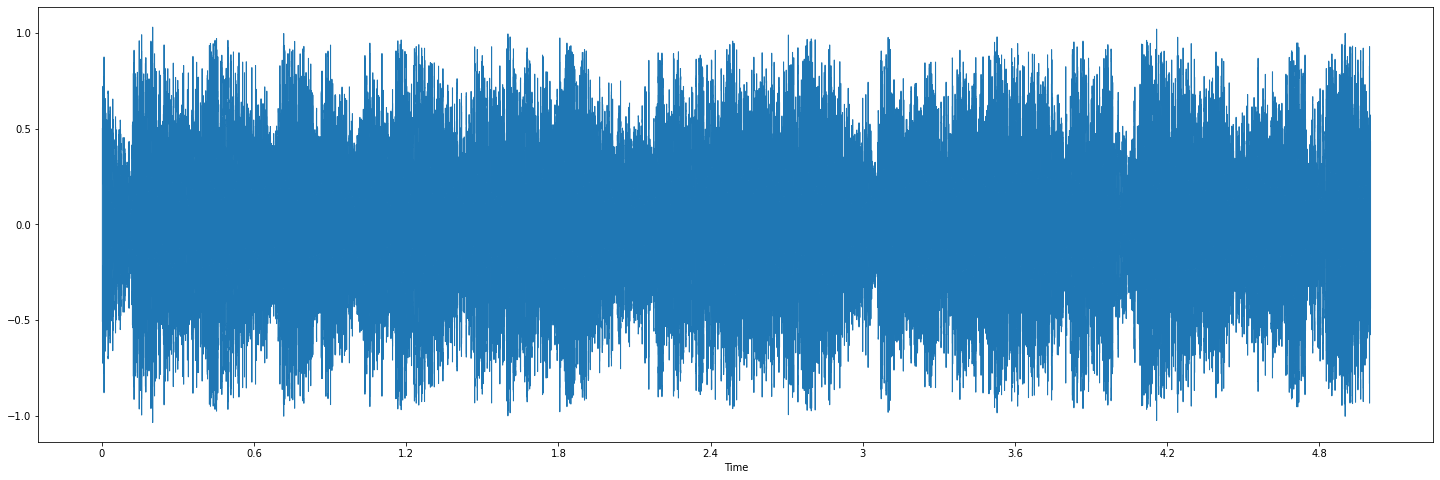

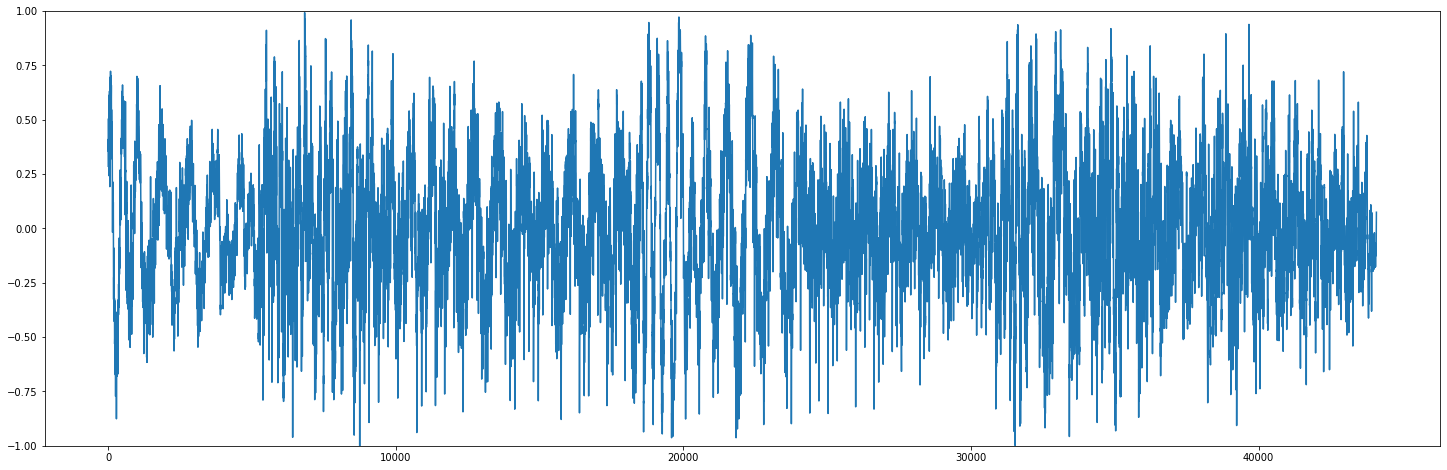

In [542]:
librosa.display.waveshow(x,sr=sr);
# plt.vlines([start, end], -1, 1)

plt.figure()
plt.plot(x[start:start+sr])
plt.ylim((-1, 1));
x[start:start+sr].shape

## chroma feature

(12, 431)

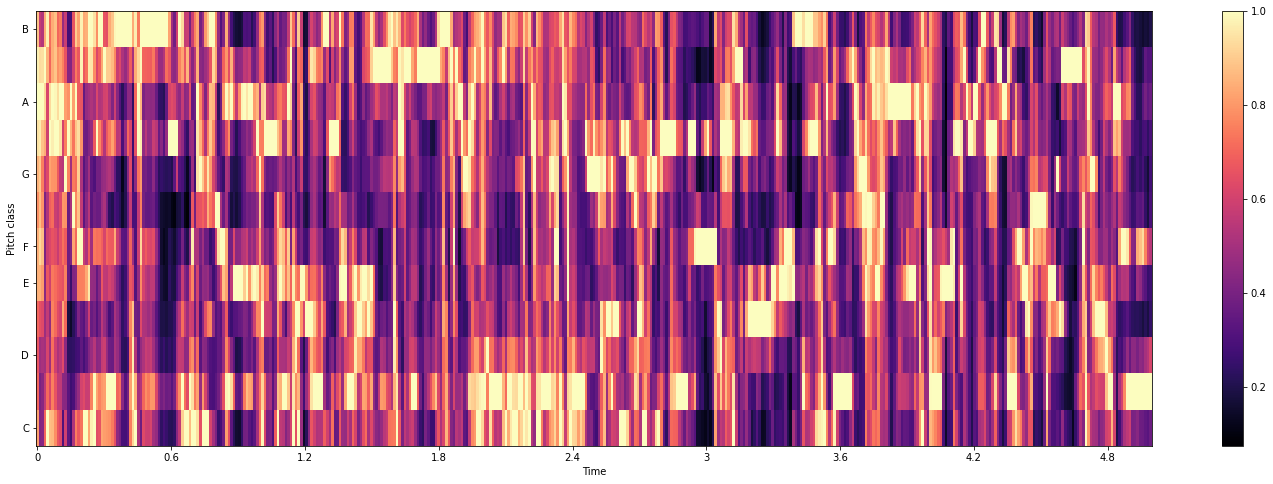

In [543]:
chroma = librosa.feature.chroma_stft(y=x,sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

(12, 87)

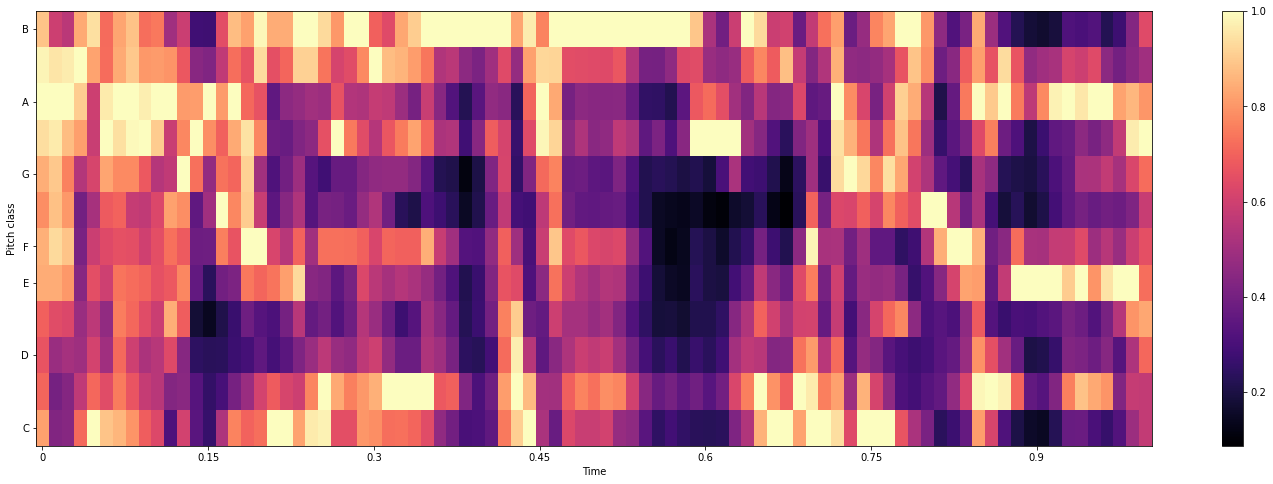

In [544]:
chroma = librosa.feature.chroma_stft(y=x[start:start+sr],sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma,sr=sr, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img)
chroma.shape

## combind genre

https://www.chosic.com/list-of-music-genres/

In [624]:
main_genre = {'pop':[],
              'electronic':[],
              'hip-hop and rap':[],
              'r&b':[],
              'latin':[],
              'rock':[],
              'metal':[],
              'country':[],
              'folk / acoustic':[],
              'classical':[],
              'jazz':[],
              'blues':[],
              'easy listening':[],
              'new age':[],
              'world / traditional folk':[]}
main_genre_list = list(main_genre)

In [625]:
f = open("chosic-genre.txt","r")
sub_genre = f.read().lower().split("\n")
f.close()

In [626]:
count = 0
for genre in sub_genre:
    if count < len(main_genre_list) and genre == main_genre_list[count]:
        main_genre_name = main_genre_list[count]
        count += 1
        continue

    main_genre[main_genre_name].append(genre)

https://www.gemtracks.com/guides/view.php?title=complete-list-of-music-genres&id=298

In [627]:
main_genre_2 = {'alternative':[],
                'anime':[],
                'blues':[],
                "children":[],
                'classical':[],
                'contemporary classical':[],
                'comedy':[],
                'country':[],
                'electronic':[],
                'easy listening':[],
                'electronic':[],
                'jazz':[],
                'latin':[],
                'metal':[],
                'new age':[],
                'opera':[],
                'pop':[],
                'r&b':[],
                'reggae':[],
                'rock':[],
                'soundtrack':[],
                'spoken word':[],
                'tex-mex / tejano':[]}
main_genre_2_list = list(main_genre_2)

In [628]:
f = open("gemtracks-genre.txt","r")
sub_genre_2 = f.read().lower().split("\n")
f.close()

In [629]:
count = 0
for i in sub_genre_2:
    main_genre_2[main_genre_2_list[count]] = i.split(",")[0:-1]
    count += 1

In [630]:
same_genre = []
not_same_genre = []
for genre in main_genre_2_list:
    if genre in main_genre_list:
        same_genre.append(genre)
    else:
        not_same_genre.append(genre)
        
for genre in main_genre_list:
    if genre not in same_genre:
        not_same_genre.append(genre)

In [631]:
len(same_genre), len(not_same_genre)

(12, 13)

In [632]:
same_genre

['blues',
 'classical',
 'country',
 'electronic',
 'easy listening',
 'jazz',
 'latin',
 'metal',
 'new age',
 'pop',
 'r&b',
 'rock']

In [633]:
all_genre = {'blues':[],
             'classical':[],
             'country':[],
             'electronic':[],
             'easy listening':[],
             'jazz':[],
             'latin':[],
             'metal':[],
             'new age':[],
             'pop':[],
             'r&b':[],
             'rock':[],
             'alternative':[],
             'anime':[],
             "children":[],
             'contemporary classical':[],
             'comedy':[],
             'opera':[],
             'reggae':[],
             'soundtrack':[],
             'spoken word':[],
             'tex-mex / tejano':[],
             'hip-hop and rap':[],
             'folk / acoustic':[],
             'world / traditional folk':[]}

In [634]:
for genre in all_genre:
    if genre in same_genre:
        all_genre[genre] = main_genre[genre] + main_genre_2[genre]
    else:
        if genre in main_genre_list:
            all_genre[genre] = main_genre[genre]
        else:
            all_genre[genre] = main_genre_2[genre]

In [635]:
len(all_genre)

25

In [636]:
get_genre = df_genre['genre'].unique()

In [637]:
all_sub_genre = []

In [638]:
for i in all_genre:
    for genre in all_genre.get(i):
        all_sub_genre.append(genre)

In [639]:
count = 0
have_genre = []
not_have_genre = []
for genre in get_genre:
    if genre in all_sub_genre:
        have_genre.append(genre)
        count += 1
    else:
        not_have_genre.append(genre)

In [640]:
temp = []
for genre in have_genre:
    for main_genre in all_genre:
        if genre in all_genre[main_genre]:
            temp.append(main_genre)

In [641]:
test = list(set(temp))

In [642]:
for i in all_genre:
    if i not in test:
        print(i)

soundtrack
spoken word
tex-mex / tejano


In [643]:
len(all_genre)

25

In [644]:
len(get_genre)

113

In [645]:
len(have_genre)

88

In [646]:
len(get_genre)-len(have_genre)

25

In [647]:
not_have_genre

['afrobeat',
 'brazil',
 'british',
 'dance',
 'drum-and-bass',
 'forro',
 'french',
 'german',
 'groove',
 'happy',
 'indian',
 'indie',
 'iranian',
 'j-dance',
 'malay',
 'mpb',
 'pagode',
 'party',
 'sad',
 'samba',
 'show-tunes',
 'songwriter',
 'spanish',
 'swedish',
 'turkish']

In [622]:
all_genre.keys()

dict_keys(['blues', 'classical', 'country', 'electronic', 'easy listening', 'jazz', 'latin', 'metal', 'new age', 'pop', 'r&b', 'rock', 'alternative', 'anime', 'children', 'contemporary classical', 'comedy', 'opera', 'reggae', 'soundtrack', 'spoken word', 'tex-mex / tejano', 'hip-hop and rap', 'folk / acoustic', 'world / traditional folk'])

## other

In [269]:
list_music_other = ['danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo']

In [273]:
df_genre.groupby("genre")[list_music_other].mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,
acoustic,0.546440,0.475285,5.340,-9.079896,0.848,0.042356,0.482403,0.028144,0.150685,0.423076,117.980444
afrobeat,0.655636,0.655600,5.432,-8.267400,0.548,0.080922,0.287818,0.371916,0.156656,0.700054,116.120104
alt-rock,0.500864,0.752492,5.328,-6.197576,0.680,0.054430,0.083948,0.078163,0.181390,0.461360,123.361228
alternative,0.564772,0.751976,5.224,-5.962980,0.520,0.108056,0.146314,0.038026,0.202850,0.490412,122.498520
ambient,0.369430,0.244085,5.008,-18.623788,0.680,0.039656,0.747524,0.582935,0.129477,0.181117,110.708192
...,...,...,...,...,...,...,...,...,...,...,...
techno,0.683992,0.793512,5.620,-7.118500,0.492,0.060262,0.084957,0.403252,0.179294,0.437440,127.925704
trance,0.542024,0.870596,5.300,-5.784636,0.512,0.098134,0.028704,0.193833,0.241626,0.348287,127.389632
trip-hop,0.639556,0.602737,5.600,-9.247276,0.488,0.067781,0.247367,0.444229,0.157232,0.443382,116.545012
